# Projeto de Redes Complexas 

# Qual é o tipo de modelo mais adequado para redes sociais?

10 de Julho de 2023

## Integrantes

- Adriane Akemi Nº USP: 11915623
- Caio Vinicius de Oliveira, Nº USP: 11932272
- Emerson Hideki Miady Nº USP: 11207943
- Juan Lucas Montanaro, Nº USP: 11912787

---------------------------------------------------------------------------

## Introdução

A análise de redes sociais é uma tarefa muito complexa pela enorme quantidade de indivíduos e relações que podem existir, nesse sentido, é de fundamental importância identificar um modelo matemático que seja capaz de representar essas redes. Então, para o nosso projeto decidimos investigar a amostra de algumas redes socias, simulamos repetidas vezes cinco modelos clássicos da literatura e por fim tentamos classificar as redes de acordo com os modelos utilizando medidas de grafo, como o grau médio de cada nó, o diâmetro, a excentricidade e etc. A saber, estamos tomando como base o artigo: L da F Costa et al J. Stat. Mech. (2010) P11015, em que também são utilizadas medidas de grafo para classificar redes.

Em primeiro lugar, considerando as três redes sociais abaixo:

- [Adolescente](http://konect.cc/networks/moreno_health/) : Cada nó é uma pessoa e as conexões ocorrem se ela se diz amiga de outra;
- [Facebook](http://konect.cc/networks/ego-facebook/) : Cada nó é um usuário e as conexões ocorrem se um usuário é amigo do outro; e
- [Hamsterster](http://konect.cc/networks/petster-hamster/) : Cada nó é um usuário e as conexões ocorrem se um usuário é amigo do outro

Utilizamos o número de vértices e o grau médio para rodarmos simulações em python dos seguintes modelos:

- Barabási-Albert; 
- Erdős–Rényi; e
- Watts-Strogatz com probabilidades de reconexão iguais à 1.0, 0.5 e 0.01.

E por fim calculamos várias medidas características para essas redes simuladas, sendo elas:

- Grau Médio
- Assortatividade
- Coeficiente de Clusterização
- Transitividade
- Entropia de Shannon
- Média dos Menores Caminhos
- Média da Intermediação
- Ponto Central de dominância
- Diâmetro
- Métrica S
- Quantidade de Baricentros
- Excentricidade Média
- $\rho$(Grau do Nó, Grau Médio dos Vizinhos)
- $\rho$(Grau do Nó, Centralidade de Proximidade)
- $\rho$(Grau do Nó, Cliques do Nó)

Agora, para o próximo passo, iremos analisar esses resultados das simulações e classificar as redes sociais como sendo mais similar a um dos cinco modelos propostos.

## Versão do python

É importante verificar a versão do Python antes de iniciarmos o projeto, pois algumas bibliotecas e funcionalidades podem ter requisitos específicos de versão.

In [1]:
import sys
print(f'Versão utilizada no projeto: {sys.version}')

Versão utilizada no projeto: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]


## Setup de Bibliotecas

In [75]:
# importações
from numpy import *
import numpy as np
import pandas as pd
import networkx as nx

import simulacao
from CONSTANTES import *

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# modelagem
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

Deixamos no código o loop que utilizamos para simular todos os modelos, mas não recomendamos que isso seja executado, pois levam cerca 2.5 horas para que tudo seja concluído e estruturamos os códigos de simulação para salvar os resultados das métricas de cada modelo para que justamente não seja necessário executarmos as simulações diversas vezes e gastarmos todo esse tempo.

In [2]:
# executando as simulacoes:
# for modelo in SIMULE.keys():
#     simulacao.main(modelo)

## Leitura dos dados

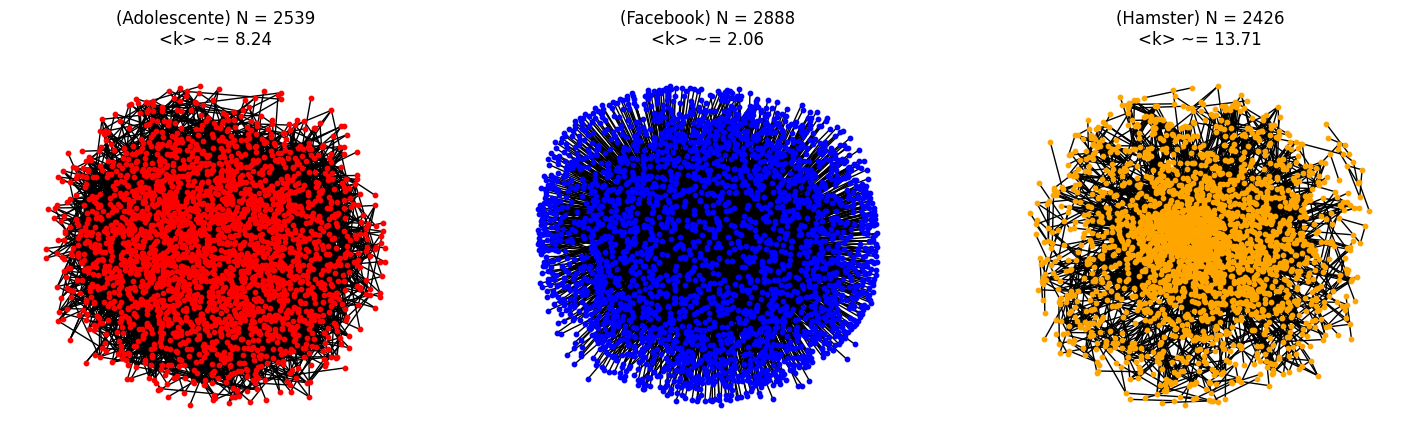

In [3]:
# carregando as redes sociais:
adol = ler_rede('adolescente', grafo=True)
face = ler_rede('facebook', grafo=True)
hams = ler_rede('hamster', grafo=True)

# gerando um grafico de todas elas
plt.figure(figsize=(18, 5))

pos_a = nx.spring_layout(adol, iterations=30, k=0.2)
pos_f = nx.spring_layout(face, iterations=20, k=0.1)
pos_h = nx.spring_layout(hams, iterations=30, k=0.1)

plt.subplot(1, 3, 1)
nx.draw(adol, pos_a, node_color='red', node_size=10, with_labels=False)
plt.title(f'(Adolescente) N = {len(adol)}\n<k> ~= {grau_medio(adol):.2f}')

plt.subplot(1, 3, 2)
nx.draw(face, pos_f, node_color='blue', node_size=10, with_labels=False)
plt.title(f'(Facebook) N = {len(face)}\n<k> ~= {grau_medio(face):.2f}')

plt.subplot(1, 3, 3)
nx.draw(hams, pos_h, node_color='orange', node_size=10, with_labels=False)
plt.title(f'(Hamster) N = {len(hams)}\n<k> ~= {grau_medio(hams):.2f}')

plt.show()

In [4]:
# carregando os resultados das simulacoes:
df_ba = pd.read_csv('Modelo_BA.csv')
df_ba['Modelo'] = 'BA'
df_er = pd.read_csv('Modelo_ER.csv')
df_er['Modelo'] = 'ER'
df_ws_p10 = pd.read_csv('Modelo_WS_p10.csv')
df_ws_p10['Modelo'] = 'WS p=1'
df_ws_p05 = pd.read_csv('Modelo_WS_p05.csv')
df_ws_p05['Modelo'] = 'WS p=0.5'
df_ws_p01 = pd.read_csv('Modelo_WS_p01.csv')
df_ws_p01['Modelo'] = 'WS p=0.01'

# definindo um unico dataframe com os resultados:
df = pd.concat(
    [df_ba, df_er, df_ws_p10, df_ws_p05, df_ws_p01],
    axis=0, ignore_index=True
)
del df_ba, df_er, df_ws_p10, df_ws_p05, df_ws_p01

print('Shape das simulacoes:', df.shape)
df.sample(10)

Shape das simulacoes: (450, 18)


,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,Rede Social,Iteracao,Modelo
155,13.610882,0.002407,0.005469,0.005365,3.886778,3.269821,0.000936,0.002664,5.0,3511467.0,1.0,4.318632,0.005276,0.956237,0.982729,hamster,6,ER
362,8.000000,-0.009810,0.624413,0.622890,0.481576,14.234174,0.005216,0.112905,35.0,651609.0,1.0,26.699095,-0.027817,0.057449,0.573130,adolescente,3,WS p=0.01
217,2.000000,-0.191221,0.000000,0.000000,1.869222,52.475815,0.025483,0.591311,140.0,12033.0,1.0,106.274979,-0.305824,0.108536,1.000000,facebook,8,WS p=1
79,11.970322,-0.035570,0.022958,0.018573,3.829055,3.091119,0.000863,0.072730,5.0,9555955.0,1.0,4.074196,-0.099262,0.729161,0.977975,hamster,20,BA
420,12.000000,0.011000,0.666158,0.665183,0.556064,9.614754,0.003554,0.060683,19.0,2098985.0,1.0,15.631080,0.034014,0.112900,0.349294,hamster,1,WS p=0.01
290,8.000000,-0.047831,0.081414,0.075589,2.838013,4.203156,0.001263,0.002926,6.0,712027.0,1.0,5.948799,-0.144903,0.847070,0.915381,adolescente,21,WS p=0.5
192,8.000000,-0.065455,0.003040,0.002867,3.030548,4.032379,0.001195,0.004642,6.0,734440.0,1.0,5.456085,-0.191857,0.915191,0.990391,adolescente,13,WS p=1
361,8.000000,-0.014458,0.624291,0.622611,0.487152,13.996067,0.005123,0.052481,34.0,651653.0,1.0,25.708548,-0.040056,0.060427,0.606508,adolescente,2,WS p=0.01
157,13.813685,-0.002944,0.005060,0.005190,3.916749,3.251825,0.000929,0.003006,5.0,3668868.0,1.0,4.298021,-0.001230,0.955806,0.984117,hamster,8,ER
419,2.000000,0.037431,0.000000,0.000000,0.145356,336.636810,0.123169,0.533914,931.0,11006.0,1.0,697.831665,0.039494,0.073027,1.000000,facebook,30,WS p=0.01


## Tratamentos

Vamos utilizar a Análise de Componentes Principais (PCA, na sigla em inglês) para reduzir a dimensão das medidas de forma que possamos construir um gráfico em 2D com as posições das simulações e das redes reais.<br>
Porém, antes de construírmos o gráfico, precisamos completar os NaNs que podem ter surgido nas métricas das simulações, normalizá-las e ainda calcular as mesmas métricas para as redes sociais.

In [5]:
# verificando se ha NaNs:
print('Qtd de NaNs por coluna:')
df.isna().sum()

Qtd de NaNs por coluna:


grau_medio                        0
assortatividade                   0
coef_clusterizacao                0
transitividade                    0
entropia                          0
media_dos_menores_caminhos        0
intermediacao_media               0
ponto_central_de_dominancia       0
diametro                          0
metrica_s                         0
qtd_baricentros                   0
excentricidade_media              0
cor_grau_e_grau_medio_vizinhos    0
cor_grau_e_proximidade            0
cor_grau_e_cliques                0
Rede Social                       0
Iteracao                          0
Modelo                            0
dtype: int64

In [6]:
# algumas estatisticas das metricas
df.describe()

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,Iteracao
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,7.490552,-0.052123,0.101055,0.099512,2.382483,32.328344,0.013841,0.183967,84.433333,1.765172e+06,1.013333,63.877404,-0.105976,0.540578,0.908914,15.500000
std,4.227592,0.058224,0.214835,0.214726,1.196851,74.364035,0.033205,0.258630,204.838719,2.422775e+06,0.114825,153.559386,0.094335,0.364331,0.187452,8.665075
min,1.999308,-0.238352,0.000000,0.000000,0.096932,3.055368,0.000848,0.001707,5.000000,5.226000e+03,1.000000,4.043694,-0.350773,0.045059,0.274683,1.000000
25%,2.000000,-0.060663,0.000000,0.000000,1.738459,3.495323,0.001004,0.003324,5.000000,2.840250e+04,1.000000,4.875443,-0.150962,0.110453,0.911518,8.000000
50%,8.000000,-0.039348,0.004632,0.004583,2.828149,4.204198,0.001263,0.051567,7.000000,7.309430e+05,1.000000,5.943875,-0.098016,0.637033,0.989938,15.500000
75%,12.000000,-0.009843,0.081270,0.075403,3.318561,13.676168,0.004997,0.418371,30.000000,2.267022e+06,1.000000,23.434718,-0.030387,0.915869,1.000000,23.000000
max,13.922506,0.037431,0.666158,0.665183,3.949879,446.309479,0.200253,0.925003,1213.000000,1.105353e+07,2.000000,903.076538,0.059437,0.959367,1.000000,30.000000


In [7]:
# separando as metricas:
X = df.drop(columns=['Rede Social', 'Iteracao', 'Modelo'])

# normalizando:
norm = StandardScaler().fit(X)
X_norm = norm.transform(X)

for i in range(X_norm.shape[1]):
    print(f'Coluna {i} \tMédia: {np.mean(X_norm[:, i]):.2f} \tVar: {np.var(X_norm[:, i]):.2f}')

Coluna 0 	Média: 0.00 	Var: 1.00
Coluna 1 	Média: 0.00 	Var: 1.00
Coluna 2 	Média: -0.00 	Var: 1.00
Coluna 3 	Média: -0.00 	Var: 1.00
Coluna 4 	Média: -0.00 	Var: 1.00
Coluna 5 	Média: 0.00 	Var: 1.00
Coluna 6 	Média: 0.00 	Var: 1.00
Coluna 7 	Média: -0.00 	Var: 1.00
Coluna 8 	Média: 0.00 	Var: 1.00
Coluna 9 	Média: 0.00 	Var: 1.00
Coluna 10 	Média: -0.00 	Var: 1.00
Coluna 11 	Média: 0.00 	Var: 1.00
Coluna 12 	Média: 0.00 	Var: 1.00
Coluna 13 	Média: 0.00 	Var: 1.00
Coluna 14 	Média: -0.00 	Var: 1.00


In [8]:
# para que possamos calcular as medidas dessas redes,
# precisamos que elas sejam totalmente conectadas, 
# entao vamos selecionar a maior componente de cada uma:

adol = adol.to_undirected()
# adol.remove_edges_from(nx.selfloop_edges(adol))
Gcc = sorted(nx.connected_components(adol), key=len, reverse=True)
adol = adol.subgraph(Gcc[0])
adol = nx.convert_node_labels_to_integers(adol, first_label=0)

print(f'(Adolescente) N={len(adol)} e <k>~={grau_medio(adol):.2f}')

face = face.to_undirected()
# face.remove_edges_from(nx.selfloop_edges(face))
Gcc = sorted(nx.connected_components(face), key=len, reverse=True)
face = face.subgraph(Gcc[0])
face = nx.convert_node_labels_to_integers(face, first_label=0)

print(f'(Facebook) N={len(face)} e <k>~={grau_medio(face):.2f}')

hams = hams.to_undirected()
# hams.remove_edges_from(nx.selfloop_edges(hams))
Gcc = sorted(nx.connected_components(hams), key=len, reverse=True)
hams = hams.subgraph(Gcc[0])
hams = nx.convert_node_labels_to_integers(hams, first_label=0)

print(f'(Hamster) N={len(hams)} e <k>~={grau_medio(hams):.2f}')

(Adolescente) N=2539 e <k>~=8.24
(Facebook) N=2888 e <k>~=2.06
(Hamster) N=2000 e <k>~=16.10


In [18]:
# calculando as medidas para cada rede:
X_adol = pd.DataFrame(calcula_medidas(adol), index=[1])
X_face = pd.DataFrame(calcula_medidas(face), index=[2])
X_hams = pd.DataFrame(calcula_medidas(hams), index=[3])

# juntando tudo:
X_real = pd.concat([X_adol, X_face, X_hams], axis=0, ignore_index=True)
del X_adol, X_face, X_hams

X_real.head()

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques
0,8.235526,0.251286,0.146677,0.141888,4.055626,4.559388,0.001403,0.010862,10.0,1205668.0,1.0,7.515557,0.485549,0.753804,0.945545
1,2.064404,-0.668214,0.027247,0.000359,0.254405,3.867421,0.000994,0.548903,9.0,2298934.0,1.0,6.759695,-0.093737,0.116812,0.999966
2,16.098000,0.022724,0.540091,0.229441,5.267414,3.588979,0.001296,0.079839,10.0,31553788.0,1.0,7.047000,0.147956,0.673895,0.855888


In [19]:
# normalizando as medidas reais tambem:
X_real_norm = norm.transform(X_real)
print(X_real_norm)

[[  0.17641331   5.216904     0.21259587   0.19757092   1.3995095
   -0.37383476  -0.3749835   -0.6700602   -0.36377975  -0.23119213
   -0.11624764  -0.36744466   6.27744      0.58590215   0.1956356 ]
 [ -1.2849362  -10.593255    -0.34393546  -0.46227777  -1.7800424
   -0.38315025  -0.3873275    1.4126043   -0.36866707   0.2205554
   -0.11624764  -0.37237242   0.12988006  -1.1644276    0.4862742 ]
 [  2.0382826    1.2869442    2.045874     0.6057649    2.4131162
   -0.38689873  -0.37821567  -0.40306258  -0.36377975  12.308929
   -0.11624764  -0.37049937   2.6947958    0.36632958  -0.28319272]]


## Verificando graficamente à qual modelo as redes se assemelham

Agora sim podemos aplicar o PCA e construir o gráfico.

In [62]:
# pca
pca = PCA(n_components=3).fit(X_norm)

print(f"Auto-valores:\n", pca.explained_variance_, "\n")
print(f"Auto-vetores:\n", pca.components_, "\n")
print(f"Variância explicada:\n", pca.explained_variance_ratio_)

Auto-valores:
 [5.82483843 4.07088043 2.49325056] 

Auto-vetores:
 [[-0.32761435 -0.14689154 -0.056625   -0.05496599 -0.29414167  0.36770072
   0.36292658  0.30371566  0.36737873 -0.21535164  0.06023076  0.36725455
  -0.07092904 -0.29940783  0.06825641]
 [ 0.12741774  0.25815319  0.47362476  0.47390992 -0.31842951  0.03628061
   0.03226823 -0.10404304  0.03511684 -0.03064164 -0.00659197  0.03543818
   0.29081735 -0.21959769 -0.46622045]
 [ 0.24285024  0.45054213 -0.14803436 -0.14899945  0.1581556   0.27237289
   0.25863617 -0.25531098  0.27386999  0.22782073  0.13587626  0.2750377
   0.38200224  0.27905353  0.13353752]] 

Variância explicada:
 [0.38745962 0.27078894 0.16584733]


In [63]:
# Tranformando X
X_pca = pca.transform(X_norm)
X_real_pca = pca.transform(X_real_norm)

# Visualizando
df_pca = pd.DataFrame(X_pca, columns = ['pc1','pc2', 'pc3'])
df_pca['Modelo'] = df['Modelo']
df_pca['Rede'] = df['Rede Social']

nomes = ['Adolescentes', 'Facebook', 'Hamsters']

fig = px.scatter(
    df_pca, x='pc1', y='pc2', color='Modelo', facet_col='Rede', width=1000, height=350,
    labels={
        "pc1": "Componente Principal 1", "pc2": "Componente Principal 2"
    })

for i in range(X_real_pca.shape[0]):
    fig.add_scatter(
        x=[X_real_pca[i, 0]], y=[X_real_pca[i, 1]], row=[1], col=[i+1],
        mode='markers', name=nomes[i],
        marker={
            'color': 'deeppink', 'size': 11,
            'line': {'color': 'black', 'width': 1.5}
        }
    )

fig.update_xaxes(matches=None)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [57]:
fig = px.scatter(
    df_pca, x='pc3', y='pc2', color='Modelo', facet_col='Rede', width=1100, height=350,
    labels={
        "pc3": "Componente Principal 3", "pc2": "Componente Principal 2"
    })

for i in range(X_real_pca.shape[0]):
    fig.add_scatter(
        x=[X_real_pca[i, 2]], y=[X_real_pca[i, 1]], row=[1], col=[i+1],
        mode='markers', name=nomes[i],
        marker={
            'color': 'deeppink', 'size': 11,
            'line': {'color': 'black', 'width': 1.5}
        }
    )

fig.update_xaxes(matches=None)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [58]:
fig = px.scatter(
    df_pca, x='pc1', y='pc2', color='Modelo', symbol='Rede', width=1000, height=500,
    labels={
        "pc1": "Componente Principal 1", "pc2": "Componente Principal 2"
    })

symbs = ['circle', 'diamond', 'square']

for i in range(X_real_pca.shape[0]):
    fig.add_scatter(
        x=[X_real_pca[i, 0]], y=[X_real_pca[i, 1]], row=[1], col=[1],
        mode='markers', name=nomes[i],
        marker={
            'color': 'deeppink', 'size': 11, 'symbol': symbs[i],
            'line': {'color': 'black', 'width': 1.5}
        }            
    )

fig.update_xaxes(matches=None)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [61]:
fig = px.scatter(
    df_pca, x='pc3', y='pc2', color='Modelo', symbol='Rede', width=1000, height=500,
    labels={
        "pc3": "Componente Principal 3", "pc2": "Componente Principal 2"
    })

symbs = ['circle', 'diamond', 'square']

for i in range(X_real_pca.shape[0]):
    fig.add_scatter(
        x=[X_real_pca[i, 2]], y=[X_real_pca[i, 1]], row=[1], col=[1],
        mode='markers', name=nomes[i],
        marker={
            'color': 'deeppink', 'size': 11, 'symbol': symbs[i],
            'line': {'color': 'black', 'width': 1.5}
        }            
    )

fig.update_xaxes(matches=None)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

Vemos pelos gráficos que infelizmente os modelos simulados parecem estar bem "distantes" das redes reais, isto é, a distribuição de nós e conexões utilizando os modelos que escolhemos não é muito semelhante à distribuição das redes sociais.<br>
Mesmo assim, vamos continuar com o trabalho e tentar classificar as redes como sendo mais próximas a determinado modelo.

## Treinando um classificador de modelo para as redes

O objetivo dessa seção é ajustar um ou mais modelos que possam classificar as redes sociais reais com base nas métricas que obtemos anteriormente reduzidas à três componentes principais. <br>
Então, primeiro vamos definir vários modelos e usar validação cruzada nos dados de treino (as redes simuladas) para escolhermos os top três que tiveram a melhor performance, utilizando como métrica de avaliação a acurácia. <br>
Após isso, treinaremos os modelos com todos os dados disponíveis e iremos conferir as classificações nas redes reais. 

In [81]:
# separando as variaveis de treino:
X = df_pca[['pc1','pc2','pc3']]
y = df_pca[['Modelo']].to_numpy().ravel()

# definindo os modelos
modelos = {
    'SVM - Linear': LinearSVC(max_iter=5000),
    'SVM - Radial': SVC(kernel='rbf', max_iter=5000),
    'SVM - Poli (3)': SVC(kernel='poly', degree=3, max_iter=5000),
    'SGD': SGDClassifier(loss='modified_huber',max_iter=5000),
    'KNN - 3': KNeighborsClassifier(n_neighbors=3),
    'KNN - 5': KNeighborsClassifier(n_neighbors=5),
    'KNN - 7': KNeighborsClassifier(n_neighbors=7),
    'Naive-Bayes': GaussianNB(),
    'Arvore': DecisionTreeClassifier(),
    'Random-Forest': RandomForestClassifier(n_estimators=500),
    'AdaBoosting': AdaBoostClassifier(learning_rate=0.5, n_estimators=500)
}

# avaliando
for nome in modelos.keys():
    # treinamento
    scores = cross_val_score(modelos[nome], X, y, cv=10, scoring='accuracy')
    # resultado
    print("Acurácia: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std() * 1.96, nome))

Acurácia: 0.55 (+/- 0.07) [SVM - Linear]
Acurácia: 0.85 (+/- 0.09) [SVM - Radial]
Acurácia: 0.47 (+/- 0.15) [SVM - Poli (3)]
Acurácia: 0.52 (+/- 0.19) [SGD]
Acurácia: 0.96 (+/- 0.09) [KNN - 3]
Acurácia: 0.95 (+/- 0.10) [KNN - 5]
Acurácia: 0.95 (+/- 0.11) [KNN - 7]
Acurácia: 0.62 (+/- 0.24) [Naive-Bayes]
Acurácia: 0.95 (+/- 0.07) [Arvore]
Acurácia: 0.96 (+/- 0.07) [Random-Forest]
Acurácia: 0.47 (+/- 0.30) [AdaBoosting]


In [82]:
# treinando o top 3 melhores modelos com todos os dados:
modelo_1 = RandomForestClassifier(n_estimators=500).fit(X,y)
modelo_2 = KNeighborsClassifier(n_neighbors=3).fit(X, y)
modelo_3 = DecisionTreeClassifier().fit(X, y)

## Predição para descobrir à qual modelo as redes mais se adequam

Finalmente, nesta última seção antes da conclusão vamos classificar as redes sociais utilizando os modelos escolhidos na seção anterior e também tentaremos verificar com que probabilidades os modelos estão classificando as redes, tentaremos verificar o quanto certo das respostas eles estão.

In [100]:
# ajustando as variaveis de teste:
X_teste = pd.DataFrame(X_real_pca, columns=['pc1','pc2','pc3'])
X_teste.index = ['Adolesc.', 'Facebook', 'Hamster']
X_teste

,pc1,pc2,pc3
Adolesc.,-2.568853,2.749738,4.844439
Facebook,2.738990,-2.852302,-6.190994
Hamster,-5.365311,1.528258,4.643786


In [103]:
for m in [modelo_1, modelo_2, modelo_3]:

    # classificando
    preds = m.predict(X_teste)
    prob_preds = m.predict_proba(X_teste).max(axis=1)
    print('Modelo:', m)
    
    # print formatado
    for i in range(X_teste.shape[0]):
        print(
            '  Rede:', X_teste.index[i],
            '\t->\tModelo:', preds[i],
            '\tProb.:', prob_preds[i]
        )
    print('')

Modelo: RandomForestClassifier(n_estimators=500)
  Rede: Adolesc. 	->	Modelo: WS p=0.01 	Prob.: 0.596
  Rede: Facebook 	->	Modelo: WS p=1 	Prob.: 0.898
  Rede: Hamster 	->	Modelo: WS p=0.01 	Prob.: 0.516

Modelo: KNeighborsClassifier(n_neighbors=3)
  Rede: Adolesc. 	->	Modelo: ER 	Prob.: 1.0
  Rede: Facebook 	->	Modelo: WS p=1 	Prob.: 1.0
  Rede: Hamster 	->	Modelo: ER 	Prob.: 1.0

Modelo: DecisionTreeClassifier()
  Rede: Adolesc. 	->	Modelo: WS p=0.01 	Prob.: 1.0
  Rede: Facebook 	->	Modelo: WS p=1 	Prob.: 1.0
  Rede: Hamster 	->	Modelo: WS p=0.01 	Prob.: 1.0



Vemos, na saída do código acima, que o modelo Watts-Strogatz (WS) com probabilidade de reconexão (p) igual à 1 para a rede social do Facebook parece ser uma certeza entre os três classificadores, já para as outras duas redes sociais, os classificadores "Floresta aleatória" e "Árvore de decisão" parecem concordar quanto à adequabilidade do modelo WS com p igual à 0.01 para ambas as redes, mas o classificador "K vizinhos mais próximos" fornece um resultado diferente: com o modelo Erdős–Rényi (ER) sendo o adequado para ambas.<br>
Além disso, vemos no primeiro classificador que as probabilidades atribuídas às respostas não são muito altas e julgamos que as probabilidades dos outros classificadores não são confiáveis por conta dos algoritmos usado para construir esses classificadores e o modo como essas probabilidades são calculadas.

## Conclusão

Portanto, acreditamos que o modelo mais adequado para redes sociais seja o de Watts-Strogatz, o que de certa forma já era esperado, pois a maior característica do modelo é gerar grafos "pequeno mundo", i.e., grafos com pequenas distâncias entre os todos nós, presença de alguns poucos "hubs" (vértices com uma quantidade altissíma de conexões) e uma enorme quantidade de vértices com poucas ligações; e essas são intuitivamente características de redes sociais.<br>
Entretanto, pelo modo como simulamos os modelos e pelos diferentes resultados que obtivemos com os classificadores, acreditamos que exista um número melhor de probabilidade de reconexões que esteja entre 1% e 50%, ou talvez, não exista um número fixo que produza um modelo adequado o suficiente para todos os casos e na verdade ele difere dependendo das características originais da rede amostrada.<br>
Em todo caso, para futuras alterações e novas simulações, acreditamos que o ideal seja remover algumas medidas que utilizamos e tiveram pouca significância na classficação e investigaríamos apenas os modelos WS com mais opções de probabilidades de reconexões.